In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files .upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime = pd.read_csv("crime_data.csv")

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [ ]:
crime["Unnamed: 0"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
crime.rename(columns = {"Unnamed: 0":"State"},inplace=True)
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
scaler=MinMaxScaler()


In [ ]:
df = scaler.fit_transform(crime.iloc[:,1:])


In [ ]:
df = pd.DataFrame(df,columns=crime.columns[1:])

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
model = KMeans(n_clusters=3)
model.fit(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
model.predict(df)

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [ ]:
crime["cluster_tag"] = model.predict(df)

In [ ]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,cluster_tag
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [ ]:
#ELBOW METHOD
l=[]
for i in range(2,12):
    model=KMeans(n_clusters=i)

    cluster_numbers=model.fit_predict(df)

    l.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-18-c8fa915f2764>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'INERTIA')

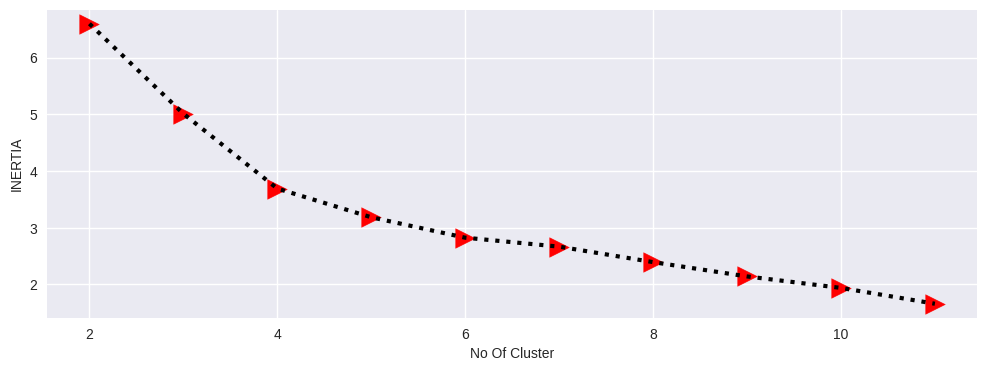

In [ ]:
plt.figure(figsize=(12,4))
plt.style.use("seaborn")
plt.plot(range(2,12),l,linestyle=":",linewidth=3,color="black")
plt.scatter(range(2,12),l,s=200,marker=">",color="r")
plt.xlabel("No Of Cluster",size=10)
plt.ylabel("INERTIA",size=10)



In [ ]:
# Silhouette_method

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
nc = range(2,15)
l = []

for i in nc:
  model = KMeans(n_clusters=i)
  model.fit(df)
  cn=model.predict(df)
  l.append(silhouette_score(df,cn))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-22-8ae6125dd867>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Silhouette_Score')

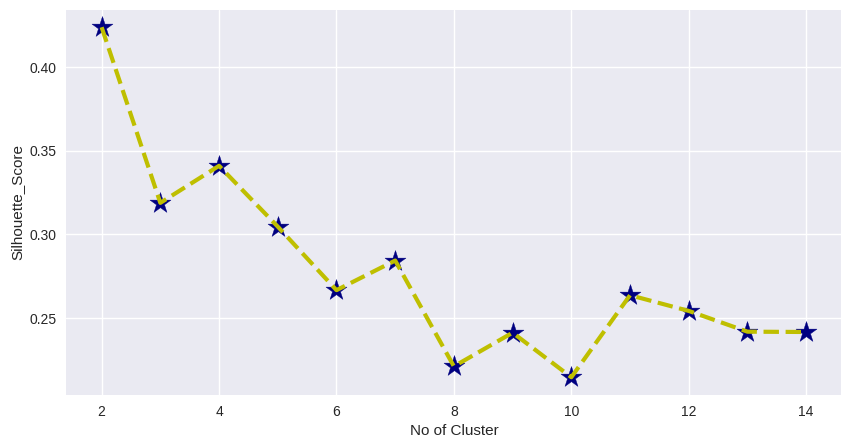

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn")
plt.plot(nc,l,linestyle="--",linewidth=3,color="y")
plt.scatter(nc,l,s=250,marker="*",color="navy")
plt.xlabel("No of Cluster")
plt.ylabel("Silhouette_Score")

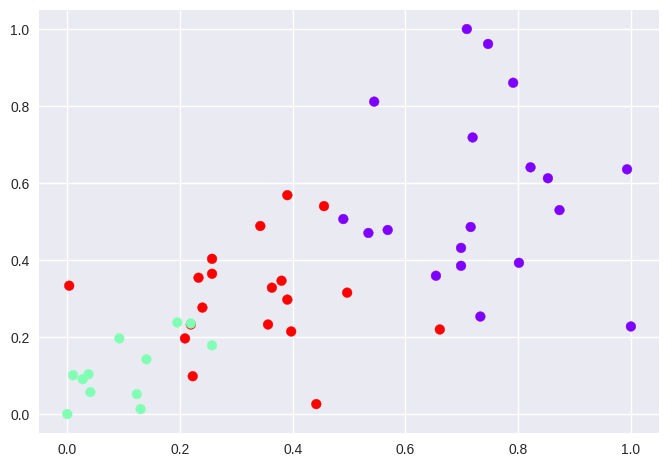

In [ ]:

plt.scatter(df.Assault,df.Rape,c=crime.cluster_tag,cmap=plt.cm.rainbow)

In [ ]:
final_model = KMeans(n_clusters=4)
final_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
centroids = final_model.cluster_centers_

In [ ]:
centroids

array([[0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [ ]:
crime.sample()

,State,Murder,Assault,UrbanPop,Rape,cluster_tag
10,Hawaii,5.3,46,83,20.2,2


In [ ]:
crime.drop(["cluster_tag"],axis=1,inplace=True)

In [ ]:
crime["cluster"]=final_model.predict(df)

In [ ]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


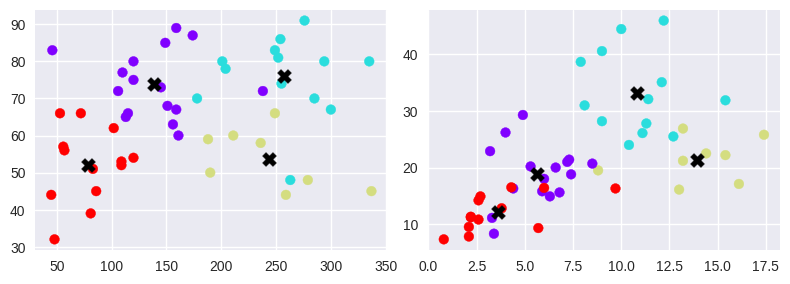

In [ ]:
plt.subplot(2,2,1)
plt.scatter(crime.Assault,crime.UrbanPop,c=crime.cluster,cmap=plt.cm.rainbow)
plt.scatter(crime[crime.cluster == 0].Assault.mean(), crime[crime.cluster == 0].UrbanPop.mean(), color='black', marker='X', s=100)  # Centroid for cluster 0
plt.scatter(crime[crime.cluster == 1].Assault.mean(), crime[crime.cluster == 1].UrbanPop.mean(), color='black', marker='X', s=100)
plt.scatter(crime[crime.cluster == 2].Assault.mean(), crime[crime.cluster == 2].UrbanPop.mean(), color='black', marker='X', s=100)  # Centroid for cluster 0
plt.scatter(crime[crime.cluster == 3].Assault.mean(), crime[crime.cluster == 3].UrbanPop.mean(), color='black', marker='X', s=100)

plt.subplot(2,2,2)
plt.scatter(crime.Murder,crime.Rape,c=crime.cluster,cmap=plt.cm.rainbow)
plt.scatter(crime[crime.cluster == 0].Murder.mean(), crime[crime.cluster == 0].Rape.mean(), color='black', marker='X', s=100)  # Centroid for cluster 0
plt.scatter(crime[crime.cluster == 1].Murder.mean(), crime[crime.cluster == 1].Rape.mean(), color='black', marker='X', s=100)
plt.scatter(crime[crime.cluster == 2].Murder.mean(), crime[crime.cluster == 2].Rape.mean(), color='black', marker='X', s=100)  # Centroid for cluster 0
plt.scatter(crime[crime.cluster == 3].Murder.mean(), crime[crime.cluster == 3].Rape.mean(), color='black', marker='X', s=100)
plt.tight_layout()

In [ ]:
silhouette_km = silhouette_score(df,crime.cluster)

In [ ]:
silhouette_km

0.3349095719865253

In [ ]:
crime.groupby("cluster").mean()

<ipython-input-34-b449614c45a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby("cluster").mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


HIERARCHICAL CLUSTER

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
model_h = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")
model_h.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [ ]:
cluster_number = model_h.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
cluster_number

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
#import scipy.cluster.hierarchy as shc
#dendro = shc.dendrogram(shc.linkage(df, method="ward"))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
link = linkage(df, method='ward', metric='euclidean')

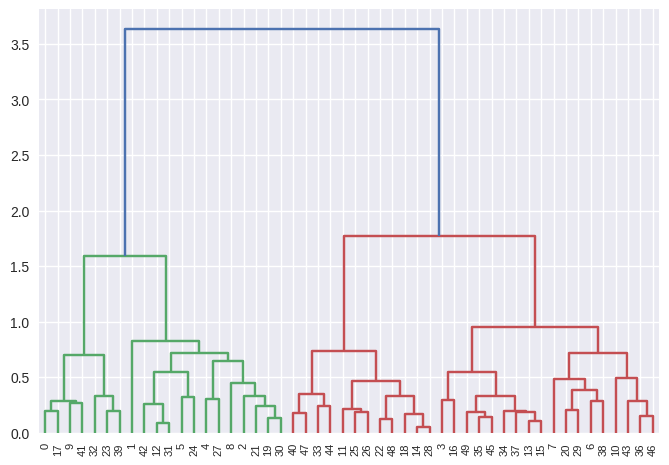

In [ ]:
dendrogram(link)
plt.show()

In [ ]:
crime1 = crime

In [ ]:
crime1["Cluster_label"]=cluster_number

In [ ]:
crime1.head()

,State,Murder,Assault,UrbanPop,Rape,cluster,Cluster_label
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,1


In [ ]:
crime1.drop(["cluster"],axis=1,inplace=True)

In [ ]:
crime1.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster_label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


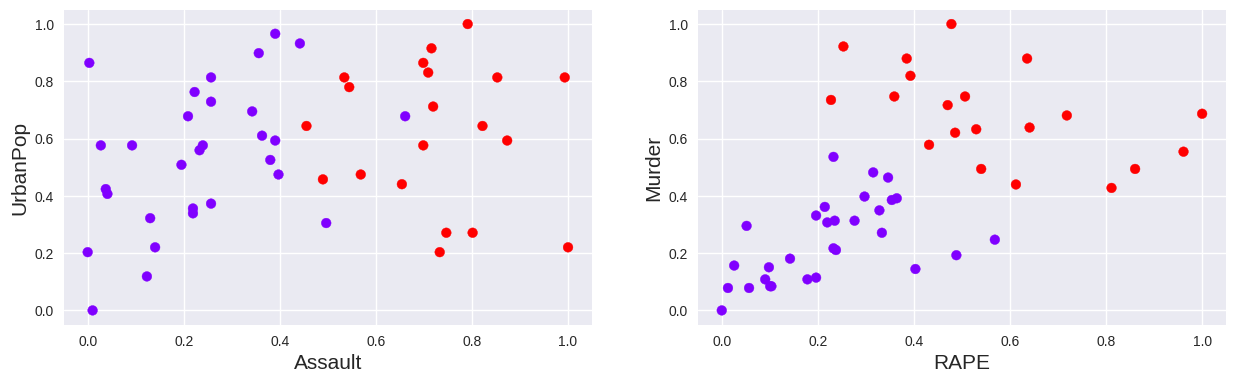

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.scatter( df.Assault,df.UrbanPop, c=cluster_number,cmap=plt.cm.rainbow)
plt.xlabel("Assault",size=15)
plt.ylabel("UrbanPop",size=15)

plt.subplot(2,2,2)
plt.scatter(df.Rape, df.Murder, c=cluster_number,cmap=plt.cm.rainbow)
plt.xlabel("RAPE",size=15)
plt.ylabel("Murder",size=15)

plt.show()

In [ ]:
crime1.groupby("Cluster_label").mean()

<ipython-input-50-220b65920f86>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime1.groupby("Cluster_label").mean()


,Murder,Assault,UrbanPop,Rape
Cluster_label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [ ]:
silhouette_hie = silhouette_score(df,cluster_number)

In [ ]:
silhouette_hie

0.42364457559625074

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster_label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
from sklearn.neighbors import NearestNeighbors

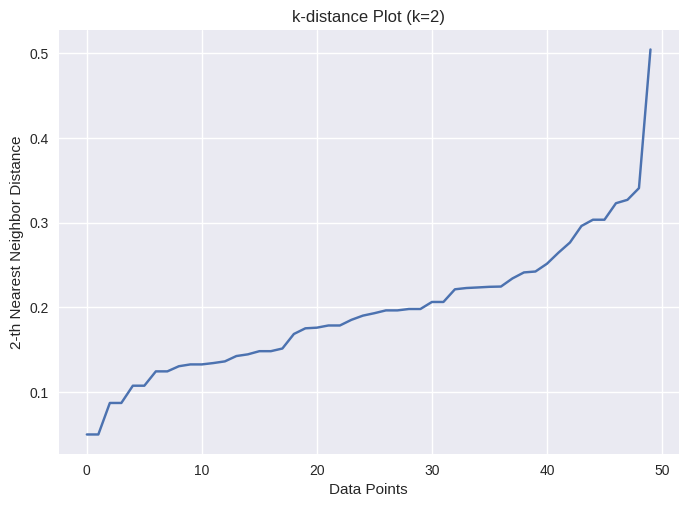

In [ ]:
k = 2  # You can experiment with different values of k
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distances, _ = nbrs.kneighbors(df)

# Step 2: Sort the distances
distances = distances[:, -1]  # Take the distance to the k-th nearest neighbor

# Step 3: Plot the sorted distances
sorted_distances = sorted(distances)
plt.plot(range(len(sorted_distances)), sorted_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'k-distance Plot (k={k})')
plt.show()

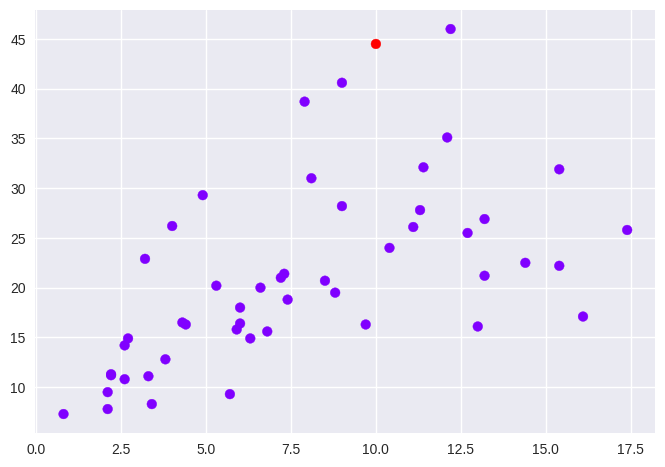

In [ ]:
model_db=DBSCAN(min_samples=4,eps=0.4)

cluster_numbers=model_db.fit_predict(df)

plt.scatter(crime.Murder,crime.Rape,c=cluster_numbers,cmap=plt.cm.rainbow_r)

In [ ]:
cluster_numbers

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
crime.sample()

,State,Murder,Assault,UrbanPop,Rape,Cluster_label
15,Kansas,6.0,115,66,18.0,0


In [ ]:
crime.drop(["Cluster_label"],axis=1,inplace=True)

In [ ]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime["cluster_label"]=cluster_numbers

In [ ]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,cluster_label
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [ ]:
silhouette_db = silhouette_score(df,cluster_numbers)

In [ ]:
silhouette_db

0.21033337025958487

In [ ]:
crime.groupby("cluster_label").mean()

<ipython-input-67-8e2b9c063d33>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby("cluster_label").mean()


,Murder,Assault,UrbanPop,Rape
cluster_label,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


In [ ]:
np.unique(cluster_numbers)

array([-1,  0])

final result

In [ ]:
cluster_methods = {"Clustering techniques":["K-Mean","Hierarchical","DBSCAN"],"Silhouette Score":[silhouette_km,silhouette_hie,silhouette_db],
                   "Total Cluster":[4,2,2]}

In [ ]:
pd.DataFrame(cluster_methods)

,Clustering techniques,Silhouette Score,Total Cluster
0,K-Mean,0.334910,4
1,Hierarchical,0.423645,2
2,DBSCAN,0.210333,2
